<a href="https://colab.research.google.com/github/kridtapon/Modern-Porfolio-Theory-For-50-Asset--Ray-dalio/blob/main/Modern_Porfolio_Theory_For_50_Asset_Ray_dalio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  52 of 52 completed
<ipython-input-23-91ceed31abf4>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.fillna(method='ffill')


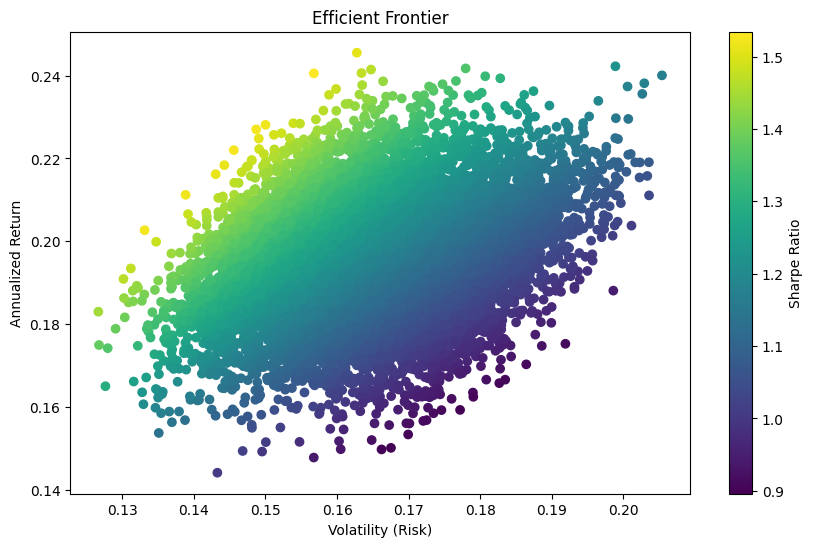


Asset Allocation for Portfolio with Max Sharpe Ratio:
 - AAPL: 3.38%
 - BTC-USD: 3.45%
 - ^SPX: 3.36%
 - GC=F: 0.48%
 - BND: 1.67%
 - VNQ: 1.14%
 - TSLA: 4.15%
 - MSFT: 1.99%
 - AMZN: 2.11%
 - GOOGL: 0.23%
 - ETH-USD: 0.87%
 - LTC-USD: 4.21%
 - ^IXIC: 3.25%
 - SI=F: 4.12%
 - CL=F: 1.16%
 - ZW=F: 3.13%
 - HG=F: 2.29%
 - DX=F: 1.88%
 - ^VIX: 2.50%
 - ^N225: 1.15%
 - ^GDAXI: 0.49%
 - ^FTSE: 2.96%
 - ^STOXX50E: 2.45%
 - BABA: 1.24%
 - NFLX: 0.29%
 - META: 4.13%
 - INTC: 3.94%
 - WMT: 0.14%
 - KO: 1.10%
 - DIS: 0.81%
 - NKE: 0.08%
 - MCD: 0.12%
 - PFE: 3.80%
 - JNJ: 1.78%
 - PG: 2.72%
 - XOM: 1.62%
 - CVX: 0.27%
 - PEP: 3.34%
 - SBUX: 2.04%
 - MA: 0.30%
 - V: 0.76%
 - T: 0.88%
 - VZ: 0.01%
 - IBM: 3.02%
 - BRK-B: 1.17%
 - LMT: 0.76%
 - GE: 0.08%
 - ORCL: 4.33%
 - ADBE: 2.25%
 - CRM: 2.25%
 - SPOT: 0.93%
 - SQ: 3.45%


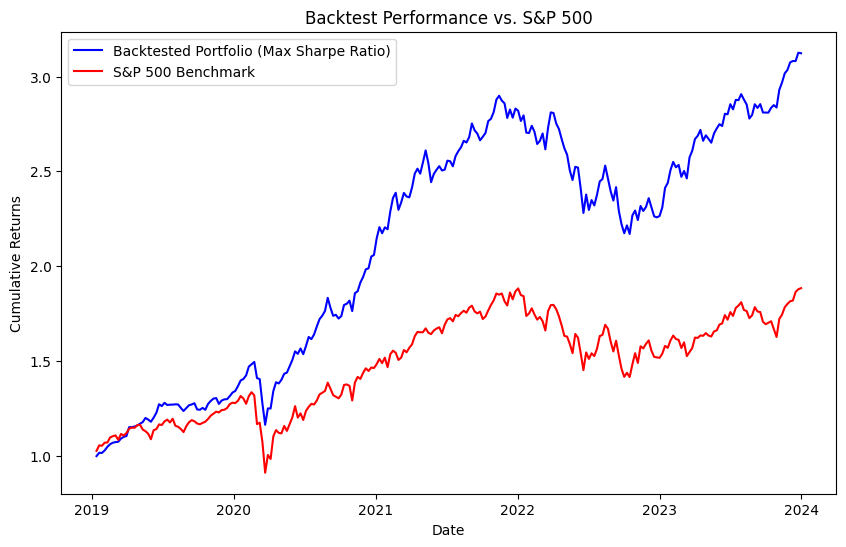

Performance of the Portfolio with Max Sharpe Ratio:
 - Annualized Return: 24.05%
 - Annualized Volatility: 15.68%
 - Annualized Sharpe Ratio: 1.53

Performance of the S&P 500 Benchmark:
 - Annualized Return: 14.67%
 - Annualized Volatility: 19.89%
 - Annualized Sharpe Ratio: 0.74


In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch Historical Data
def fetch_data(assets, start='2019-01-01', end='2024-01-01'):
    data = yf.download(assets, start=start, end=end, period='1d')['Adj Close']
    return data.fillna(method='ffill')

# Step 2: Resample Data to Weekly Frequency
def resample_data(data):
    df_weekly = data.resample('W').last()
    return df_weekly.pct_change()

# Step 3: Calculate Mean Returns and Covariance Matrix
def calculate_returns_and_covariance(df_ret):
    mean_returns = df_ret.mean()
    cov_matrix = df_ret.cov()
    return mean_returns, cov_matrix

# Step 4: Simulate Portfolios
def simulate_portfolios(mean_returns, cov_matrix, num_portfolios=10000):
    results = np.zeros((3, num_portfolios))  # Store returns, volatility, and portfolio weights
    weights_list = []

    for i in range(num_portfolios):
        # Randomly assign portfolio weights
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)  # Normalize the weights so they sum to 1

        # Portfolio return and risk (volatility)
        portfolio_return = np.sum(weights * mean_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Save the results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        weights_list.append(weights)  # Append the weights list for each portfolio

    results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Weights"])

    # Annualize the returns and volatilities
    results_df['Annualized Return'] = results_df['Return'] * 52
    results_df['Annualized Volatility'] = results_df['Volatility'] * np.sqrt(52)

    # Calculate the Sharpe ratio (Annualized)
    results_df['Sharpe Ratio'] = results_df['Annualized Return'] / results_df['Annualized Volatility']

    return results_df, weights_list

# Step 5: Plot Efficient Frontier
def plot_efficient_frontier(results_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['Annualized Volatility'], results_df['Annualized Return'],
                c=results_df['Sharpe Ratio'], cmap='viridis', marker='o')
    plt.title('Efficient Frontier')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Annualized Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

# Step 6: Get Portfolio with Maximum Sharpe Ratio
def get_max_sharpe_portfolio(results_df, weights_list, assets):
    max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()  # Index of portfolio with max Sharpe ratio
    max_sharpe_weights = weights_list[max_sharpe_idx]

    # Print the weights of each asset in the portfolio with max Sharpe ratio
    print("\nAsset Allocation for Portfolio with Max Sharpe Ratio:")
    for i, asset in enumerate(assets):
        print(f" - {asset}: {max_sharpe_weights[i] * 100:.2f}%")

    return max_sharpe_weights, results_df.loc[max_sharpe_idx]

# Step 7: Backtest the Portfolio
def backtest_portfolio(df_ret, max_sharpe_weights):
    portfolio_returns = df_ret.dot(max_sharpe_weights)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    return cumulative_returns

# Step 8: Compare Portfolio with Benchmark
def compare_with_benchmark(cumulative_returns, df_ret):
    benchmark_returns = df_ret['^SPX']  # Example: using S&P 500 as benchmark
    benchmark_cumulative = (1 + benchmark_returns).cumprod()

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label='Backtested Portfolio (Max Sharpe Ratio)', color='b')
    plt.plot(benchmark_cumulative, label='S&P 500 Benchmark', color='r')
    plt.title('Backtest Performance vs. S&P 500')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

# Step 9: Print Performance Metrics
def print_performance_metrics(results_df, max_sharpe_idx, df_ret):
    # Extract performance metrics of the best portfolio
    best_portfolio_return = results_df.loc[max_sharpe_idx, 'Annualized Return']
    best_portfolio_volatility = results_df.loc[max_sharpe_idx, 'Annualized Volatility']
    sharpe_ratio = results_df.loc[max_sharpe_idx, 'Sharpe Ratio']

    # Calculate the S&P 500 metrics
    sp500_return = df_ret['^SPX'].mean()
    sp500_volatility = df_ret['^SPX'].std()

    # Annualizing the S&P 500 return and volatility
    sp500_annualized_return = sp500_return * 52
    sp500_annualized_volatility = sp500_volatility * np.sqrt(52)

    # Sharpe ratio for S&P 500 (annualized)
    sp500_sharpe = sp500_annualized_return / sp500_annualized_volatility

    # Print the results for the portfolio with max Sharpe ratio
    print("Performance of the Portfolio with Max Sharpe Ratio:")
    print(f" - Annualized Return: {best_portfolio_return:.2%}")
    print(f" - Annualized Volatility: {best_portfolio_volatility:.2%}")
    print(f" - Annualized Sharpe Ratio: {sharpe_ratio:.2f}")

    # Print the results for the S&P 500 benchmark
    print("\nPerformance of the S&P 500 Benchmark:")
    print(f" - Annualized Return: {sp500_annualized_return:.2%}")
    print(f" - Annualized Volatility: {sp500_annualized_volatility:.2%}")
    print(f" - Annualized Sharpe Ratio: {sp500_sharpe:.2f}")

# Main function to orchestrate the steps
def main():
    assets = [
        "AAPL", "BTC-USD", "^SPX", "GC=F", "BND", "VNQ", "TSLA", "MSFT", "AMZN", "GOOGL",
        "ETH-USD", "LTC-USD", "^IXIC", "SI=F", "CL=F", "ZW=F", "HG=F", "DX=F", "^VIX", "^N225",
        "^GDAXI", "^FTSE", "^STOXX50E", "BABA", "NFLX", "META", "INTC", "WMT", "KO", "DIS",
        "NKE", "MCD", "PFE", "JNJ", "PG", "XOM", "CVX", "PEP", "SBUX", "MA", "V", "T", "VZ",
        "IBM", "BRK-B", "LMT", "GE", "ORCL", "ADBE", "CRM", "SPOT", "SQ"
    ]

    # Fetch and process data
    data = fetch_data(assets)
    df_ret = resample_data(data)

    # Calculate expected returns and covariance matrix
    mean_returns, cov_matrix = calculate_returns_and_covariance(df_ret)

    # Simulate portfolios
    results_df, weights_list = simulate_portfolios(mean_returns, cov_matrix)

    # Plot the efficient frontier
    plot_efficient_frontier(results_df)

    # Get the portfolio with max Sharpe ratio
    max_sharpe_weights, best_portfolio = get_max_sharpe_portfolio(results_df, weights_list, assets)

    # Backtest the portfolio
    cumulative_returns = backtest_portfolio(df_ret, max_sharpe_weights)

    # Compare with benchmark
    compare_with_benchmark(cumulative_returns, df_ret)

    # Print performance metrics
    print_performance_metrics(results_df, best_portfolio.name, df_ret)

# Run the main function
if __name__ == "__main__":
    main()
